In [9]:
import pandas as pd
import numpy as np

#load the dataframe
with open('census-bureau.columns', 'r') as f:
    column_names = [line.strip() for line in f.readlines()]

df = pd.read_csv('census-bureau.data', names=column_names, header=None)


df.head(10)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [10]:
#checking unique values to get an idea of categorical variables
for column in df.columns:
    print({'column': column, 'unique_values': df[column].unique()})

{'column': 'age', 'unique_values': array([73, 58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39,
       16, 35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66,
       84, 52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53,
       40, 54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45,
       62, 23, 69, 75, 44, 59, 60, 64, 65, 70, 67, 78, 20, 14, 83, 86, 89,
       77, 79, 82, 80, 87, 88])}
{'column': 'class of worker', 'unique_values': array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)}
{'column': 'detailed industry recode', 'unique_values': array([ 0,  4, 40, 34, 43, 37, 24, 39, 12, 35, 45,  3, 19, 29, 32, 48, 33,
       23, 44, 36, 31, 30, 41,  5, 11,  9, 42,  6, 18, 50,  2,  1, 26, 47,
       16, 14, 22, 17,  7,  8, 25, 46, 27, 15, 13, 49, 38, 21, 28, 20, 51

In [11]:
df.replace('?', 'Missing', inplace=True)

In [12]:
X = df.drop(columns=['weight', 'year'], axis=1) # ignore columns not useful for income
X = X.drop(columns = ['label'], axis=1) # drop target variable from features

y = df['label']  # target variable

print("Shape of features:", X.shape)
print("Shape of target variable:", y.shape)

Shape of features: (199523, 39)
Shape of target variable: (199523,)


In [13]:
text_columns = []
number_columns = []
for column in X.columns:
    if X[column].dtype == 'object':
        text_columns.append(column)
    else:
        number_columns.append(column)

#following columns are actually categorical in nature
number_columns.remove('detailed industry recode')
number_columns.remove('detailed occupation recode')
text_columns += ['detailed industry recode', 'detailed occupation recode']

print("# of text columns:", len(text_columns))
print("# of number columns:", len(number_columns))
print("Text columns:", text_columns)
print("Number columns:", number_columns)

# of text columns: 30
# of number columns: 9
Text columns: ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', "fill inc questionnaire for veteran's admin", 'detailed industry recode', 'detailed occupation recode']
Number columns: ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'o

In [14]:
class_mapping = {'- 50000.': 0, '50000+.': 1}
y = y.map(class_mapping)    
print("Mapped target variable unique values:", y.unique())


Mapped target variable unique values: [0 1]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("Training set class distribution:", np.unique(y_train, return_counts=True))
print("Testing set class distribution:", np.unique(y_test, return_counts=True))

Training set shape: (159618, 39) (159618,)
Testing set shape: (39905, 39) (39905,)
Training set class distribution: (array([0, 1]), array([149712,   9906]))
Testing set class distribution: (array([0, 1]), array([37429,  2476]))


In [16]:
X_train

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year
19304,4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0
190135,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0
103736,47,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Widowed,Not in universe or children,Not in universe,...,0,Not in universe,Holand-Netherlands,Holand-Netherlands,Holand-Netherlands,Foreign born- U S citizen by naturalization,0,Not in universe,2,0
111242,52,Private,33,29,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Other service,...,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50
41624,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,0,Neither parent present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0
75089,75,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,0,Not in universe,Missing,Missing,United-States,Native- Born in the United States,0,Not in universe,2,0
196308,49,Not in universe,0,0,11th grade,0,Not in universe,Married-spouse absent,Not in universe or children,Not in universe,...,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0
31906,32,Not in universe,0,0,Associates degree-academic program,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0


In [17]:
X_train[number_columns]

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year
19304,4,0,0,0,0,0,0,0,0
190135,11,0,0,0,0,0,0,0,0
103736,47,0,0,0,0,0,0,2,0
111242,52,0,0,0,0,1,0,2,50
41624,11,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
15778,0,0,0,0,0,0,0,0,0
75089,75,0,0,0,250,0,0,2,0
196308,49,0,0,0,0,0,0,2,0
31906,32,0,0,0,0,0,0,2,0


In [18]:
from sklearn.preprocessing import StandardScaler

def scale_numeric_data(X_data,num_cols):
    X_scaled = X_data.copy()
    scaler = StandardScaler()
    X_scaled[num_cols] = scaler.fit_transform(X_data[num_cols])
    return X_scaled



In [20]:
from sklearn.preprocessing import LabelEncoder
def encode_data_lr(X_data, le_columns, ohe_columns):
    X_encoded = X_data.copy()
    
    le = LabelEncoder()
    for col in le_columns:
        X_encoded[col] = le.fit_transform(X_data[col])
    
    X_encoded = pd.get_dummies(X_encoded, columns=ohe_columns, drop_first=True)
    
    return X_encoded

le_columns = ['class of worker','education','full or part time employment stat','family members under 18'] # columns which can be relevantly ranked based on income hence label encoded
ohe_columns = [col for col in text_columns if col not in le_columns] #columns which need one hot encoding



x_train = scale_numeric_data(X_train, number_columns)
x_train = encode_data_lr(x_train, le_columns, ohe_columns)

print(x_train.shape)

x_train.head(10)



(159618, 442)


,age,class of worker,education,wage per hour,full or part time employment stat,capital gains,capital losses,dividends from stocks,num persons worked for employer,family members under 18,...,detailed occupation recode_37,detailed occupation recode_38,detailed occupation recode_39,detailed occupation recode_40,detailed occupation recode_41,detailed occupation recode_42,detailed occupation recode_43,detailed occupation recode_44,detailed occupation recode_45,detailed occupation recode_46
19304,-1.365988,3,10,-0.200987,0,-0.092798,-0.137549,-0.098606,-0.827535,0,...,False,False,False,False,False,False,False,False,False,False
190135,-1.052250,3,10,-0.200987,0,-0.092798,-0.137549,-0.098606,-0.827535,0,...,False,False,False,False,False,False,False,False,False,False
103736,0.561259,3,9,-0.200987,2,-0.092798,-0.137549,-0.098606,-0.827535,4,...,False,False,False,False,False,False,False,False,False,False
111242,0.785358,4,12,-0.200987,1,-0.092798,-0.137549,-0.098606,-0.404901,4,...,False,False,False,False,False,False,False,False,False,False
41624,-1.052250,3,10,-0.200987,0,-0.092798,-0.137549,-0.098606,-0.827535,3,...,False,False,False,False,False,False,False,False,False,False
128440,0.964637,4,5,-0.200987,1,-0.092798,-0.137549,-0.098606,-0.404901,4,...,False,False,False,False,False,False,False,False,False,False
65236,0.157882,4,12,-0.200987,0,-0.092798,-0.137549,-0.098606,-0.404901,4,...,False,False,False,False,False,False,False,False,False,False
124071,1.816211,3,0,-0.200987,0,-0.092798,-0.137549,-0.098606,-0.827535,4,...,False,False,False,False,False,False,False,False,False,False
63653,1.502473,3,5,-0.200987,2,-0.092798,-0.137549,-0.098606,-0.827535,4,...,False,False,False,False,False,False,False,False,False,False
35197,0.157882,6,8,-0.200987,5,-0.092798,-0.137549,-0.098606,-0.404901,4,...,False,False,False,False,False,False,False,False,False,False


In [21]:
x_test = scale_numeric_data(X_test, number_columns)
x_test = encode_data_lr(x_test, le_columns, ohe_columns)

print(x_test.shape)

x_test.head(10)

(39905, 436)


,age,class of worker,education,wage per hour,full or part time employment stat,capital gains,capital losses,dividends from stocks,num persons worked for employer,family members under 18,...,detailed occupation recode_37,detailed occupation recode_38,detailed occupation recode_39,detailed occupation recode_40,detailed occupation recode_41,detailed occupation recode_42,detailed occupation recode_43,detailed occupation recode_44,detailed occupation recode_45,detailed occupation recode_46
96828,-1.145859,3,10,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.825342,1,...,False,False,False,False,False,False,False,False,False,False
29328,0.871389,1,16,-0.204367,1,0.658490,-0.135996,-0.105006,1.715829,4,...,False,False,False,False,False,False,False,False,False,False
30351,-0.742409,7,16,-0.204367,1,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
152474,-0.294132,5,12,-0.204367,1,-0.091537,-0.135996,0.755418,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
143717,0.198973,1,9,-0.204367,1,-0.091537,-0.135996,-0.105006,1.715829,4,...,False,False,False,False,False,False,False,False,False,False
77432,0.333456,4,16,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
164552,-0.338960,4,12,4.544611,1,-0.091537,-0.135996,-0.105006,0.868772,4,...,False,False,False,False,False,False,False,False,False,False
116612,0.467939,4,12,-0.204367,1,-0.091537,-0.135996,-0.059117,1.715829,4,...,True,False,False,False,False,False,False,False,False,False
113030,0.647250,3,4,-0.204367,2,-0.091537,-0.135996,-0.105006,-0.825342,4,...,False,False,False,False,False,False,False,False,False,False
168021,-0.025166,6,12,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False


In [22]:
extra_cols = list(x_train.columns.difference(x_test.columns))
for col in extra_cols:
    x_test[col] = 0
x_test = x_test[x_train.columns]  # Reorder columns to match training set
x_test.head(10)

,age,class of worker,education,wage per hour,full or part time employment stat,capital gains,capital losses,dividends from stocks,num persons worked for employer,family members under 18,...,detailed occupation recode_37,detailed occupation recode_38,detailed occupation recode_39,detailed occupation recode_40,detailed occupation recode_41,detailed occupation recode_42,detailed occupation recode_43,detailed occupation recode_44,detailed occupation recode_45,detailed occupation recode_46
96828,-1.145859,3,10,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.825342,1,...,False,False,False,False,False,False,False,False,False,False
29328,0.871389,1,16,-0.204367,1,0.658490,-0.135996,-0.105006,1.715829,4,...,False,False,False,False,False,False,False,False,False,False
30351,-0.742409,7,16,-0.204367,1,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
152474,-0.294132,5,12,-0.204367,1,-0.091537,-0.135996,0.755418,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
143717,0.198973,1,9,-0.204367,1,-0.091537,-0.135996,-0.105006,1.715829,4,...,False,False,False,False,False,False,False,False,False,False
77432,0.333456,4,16,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False
164552,-0.338960,4,12,4.544611,1,-0.091537,-0.135996,-0.105006,0.868772,4,...,False,False,False,False,False,False,False,False,False,False
116612,0.467939,4,12,-0.204367,1,-0.091537,-0.135996,-0.059117,1.715829,4,...,True,False,False,False,False,False,False,False,False,False
113030,0.647250,3,4,-0.204367,2,-0.091537,-0.135996,-0.105006,-0.825342,4,...,False,False,False,False,False,False,False,False,False,False
168021,-0.025166,6,12,-0.204367,0,-0.091537,-0.135996,-0.105006,-0.401814,4,...,False,False,False,False,False,False,False,False,False,False


Logistic Regression Model Accuracy: 95.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     37429
           1       0.73      0.34      0.46      2476

    accuracy                           0.95     39905
   macro avg       0.84      0.67      0.72     39905
weighted avg       0.94      0.95      0.94     39905

ROC-AUC Score: 0.94


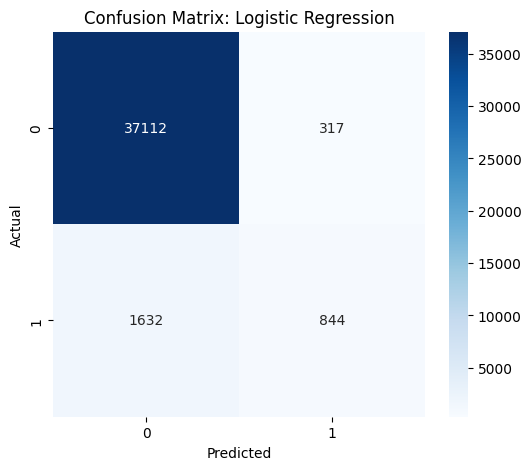

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)
accuracy = lr_model.score(x_test, y_test)
print("Logistic Regression Model Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc_score = roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1])
print("ROC-AUC Score: {:.2f}".format(roc_auc_score))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


analysis_df = X_test.copy()
analysis_df['Actual'] = y_test
analysis_df['Predicted'] = y_pred


def tag_error(row):
    if row['Actual'] == 1 and row['Predicted'] == 1: return 'True Rich'
    if row['Actual'] == 0 and row['Predicted'] == 0: return 'True Poor'
    if row['Actual'] == 0 and row['Predicted'] == 1: return 'Fake Rich'
    if row['Actual'] == 1 and row['Predicted'] == 0: return 'Fake Poor'
    return 'Error'

def mean_std_range(x):
    m = x.mean()
    s = x.std()
    return f"{m-s:.1f} - {m+s:.1f}"

analysis_df['Error_Type'] = analysis_df.apply(tag_error, axis=1)
analysis_df


#compare numeric features
mean_df  = analysis_df.groupby('Error_Type')[number_columns].mean()

std_df = analysis_df.groupby('Error_Type')[number_columns].std()

range_df = analysis_df.groupby('Error_Type')[number_columns].agg(mean_std_range)


mean_df.head()




,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year
Error_Type,,,,,,,,,
Fake Poor,44.754289,77.060662,961.509191,114.049020,419.908088,3.914216,0.260417,1.979779,47.403186
Fake Rich,49.634069,43.280757,5632.570978,389.555205,1979.867508,4.041009,0.214511,1.974763,48.208202
True Poor,33.669595,53.770371,98.844255,22.327280,92.048879,1.790014,0.167843,1.482890,21.212600
True Rich,48.404028,58.481043,11361.752370,358.528436,3052.093602,4.341232,0.246445,1.976303,50.739336


In [31]:
range_df

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year
Error_Type,,,,,,,,,
Fake Poor,32.9 - 56.6,-323.7 - 477.8,-2351.7 - 4274.7,-370.7 - 598.8,-1151.2 - 1991.0,1.8 - 6.1,-0.4 - 0.9,1.8 - 2.1,34.2 - 60.6
Fake Rich,36.2 - 63.0,-215.5 - 302.1,-14199.6 - 25464.7,-401.3 - 1180.4,-3338.5 - 7298.2,1.8 - 6.2,-0.4 - 0.8,1.8 - 2.1,35.5 - 60.9
True Poor,11.0 - 56.3,-202.5 - 310.0,-683.4 - 881.1,-182.8 - 227.5,-611.0 - 795.1,-0.5 - 4.1,-0.4 - 0.7,0.6 - 2.4,-2.8 - 45.3
True Rich,38.1 - 58.7,-352.2 - 469.2,-14099.2 - 36822.7,-430.9 - 1148.0,-6786.5 - 12890.7,2.4 - 6.3,-0.4 - 0.9,1.8 - 2.1,43.8 - 57.7


In [ ]:
range_df.to_csv('lr_numeric_col_analysis.csv')

In [30]:
results  = {}
for col in text_columns:
    
    grouped = analysis_df.groupby('Error_Type')[col].value_counts(normalize=True)
    
    
    col_stats = {}
    for error_type in ['True Rich', 'Fake Poor', 'Fake Rich', 'True Poor']:
        try:
            
            top_cat = grouped[error_type].idxmax()
            top_pct = grouped[error_type].max() * 100
            col_stats[error_type] = f"{top_cat} ({top_pct:.1f}%)"
        except KeyError:
            col_stats[error_type] = "N/A"
            
    results[col] = col_stats


output_df = pd.DataFrame(results).T
output_df

,True Rich,Fake Poor,Fake Rich,True Poor
class of worker,Private (65.4%),Private (57.8%),Private (58.0%),Not in universe (53.5%)
education,Bachelors degree(BA AB BS) (32.5%),Bachelors degree(BA AB BS) (32.7%),Bachelors degree(BA AB BS) (29.7%),Children (25.4%)
enroll in edu inst last wk,Not in universe (100.0%),Not in universe (99.7%),Not in universe (100.0%),Not in universe (93.2%)
marital stat,Married-civilian spouse present (83.6%),Married-civilian spouse present (75.0%),Married-civilian spouse present (83.3%),Never married (46.0%)
major industry code,Manufacturing-durable goods (15.9%),Manufacturing-durable goods (10.5%),Manufacturing-durable goods (14.2%),Not in universe or children (53.8%)
major occupation code,Professional specialty (43.5%),Executive admin and managerial (24.8%),Professional specialty (39.4%),Not in universe (53.8%)
race,White (94.5%),White (89.2%),White (94.6%),White (83.3%)
hispanic origin,All other (98.0%),All other (94.7%),All other (97.2%),All other (86.1%)
sex,Male (92.7%),Male (71.8%),Male (88.6%),Female (54.6%)
member of a labor union,Not in universe (80.5%),Not in universe (83.1%),Not in universe (83.9%),Not in universe (91.0%)


In [29]:
output_df.to_csv('lr_categorical_col_analysis.csv')

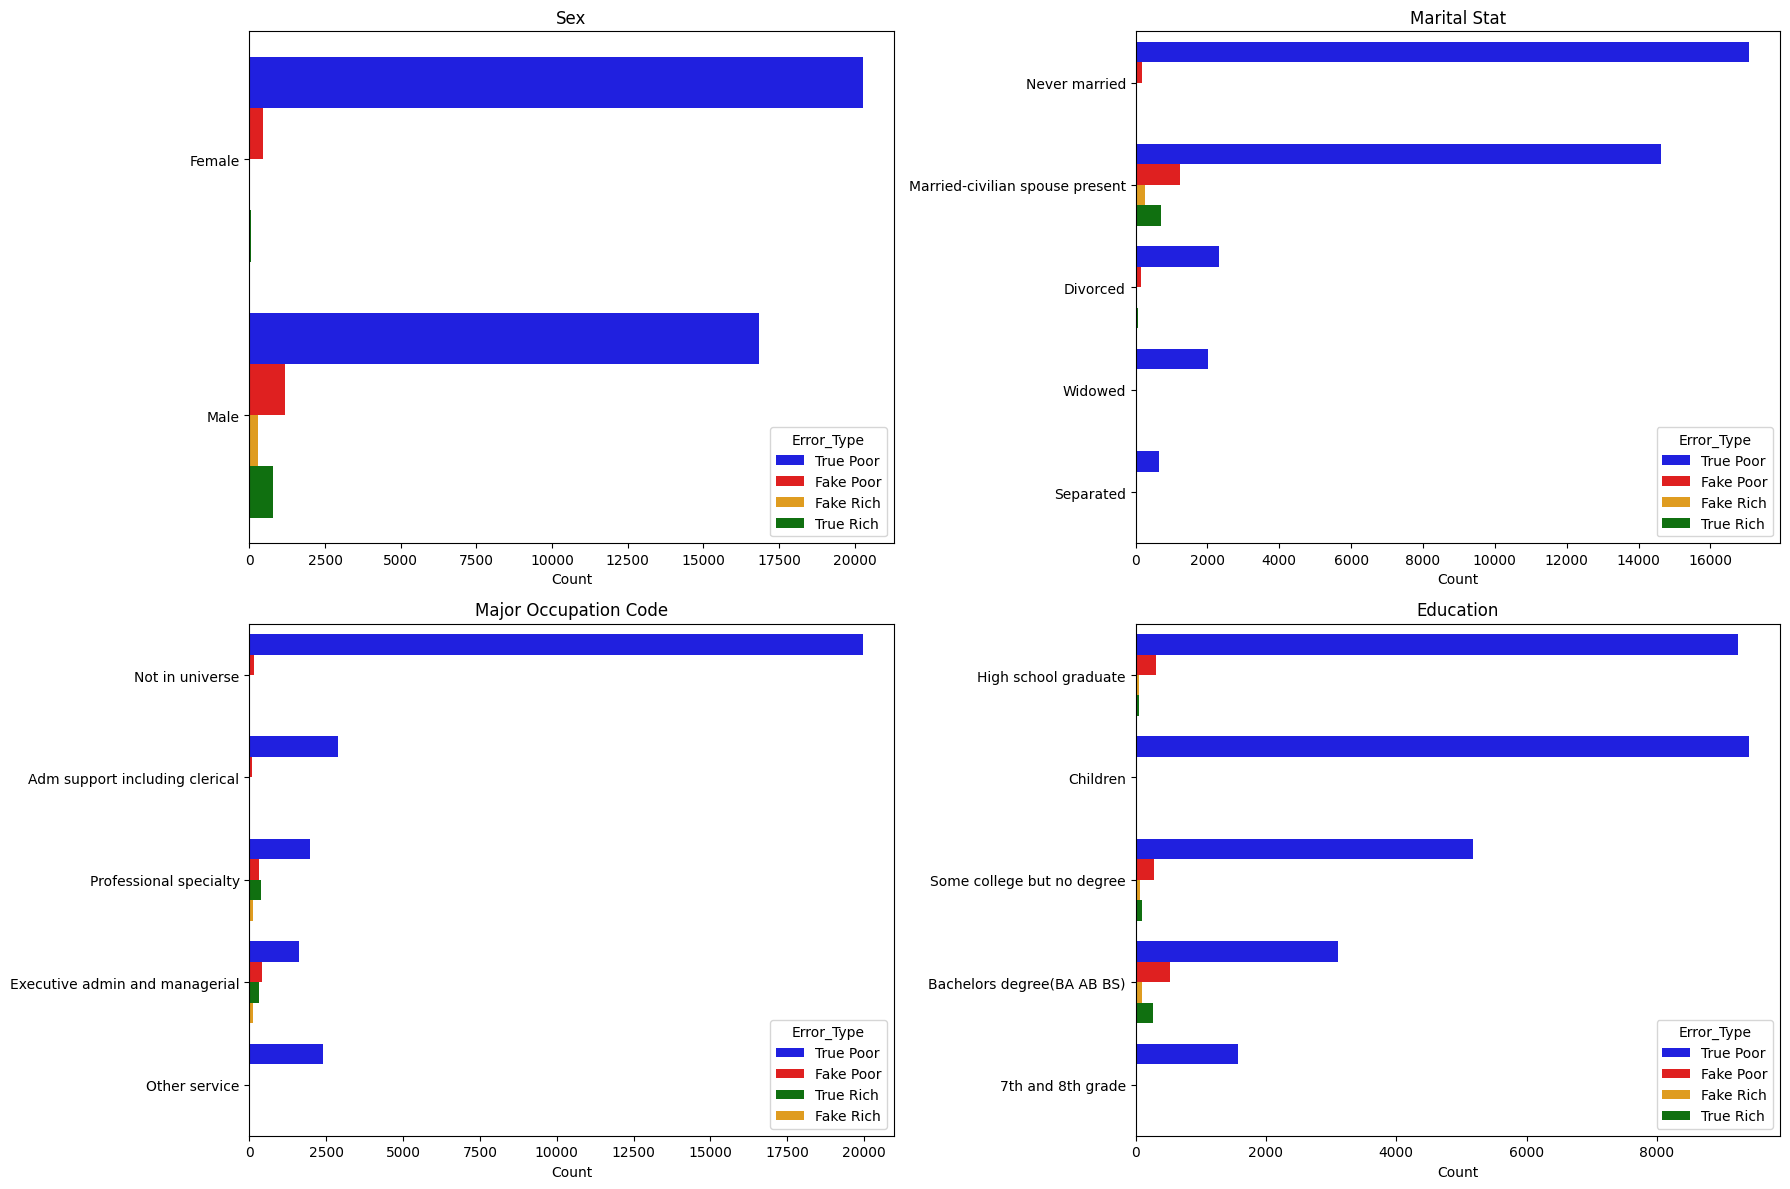

In [32]:
text_features = ['sex', 'marital stat', 'major occupation code', 'education']
palette = {
    'True Rich': 'green', 
    'Fake Poor': 'red', 
    'Fake Rich': 'orange', 
    'True Poor': 'blue'
}


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for ax, feature in zip(axes.flatten(), text_features):
    
    
    top_categories = analysis_df[feature].value_counts().nlargest(5).index
    plot_data = analysis_df[analysis_df[feature].isin(top_categories)]
    
    # 3. Plot
    sns.countplot(data=plot_data, y=feature, hue='Error_Type', 
                  palette=palette, ax=ax, order=top_categories)
    
    ax.set_title(f'{feature.title()}')
    ax.set_xlabel('Count')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

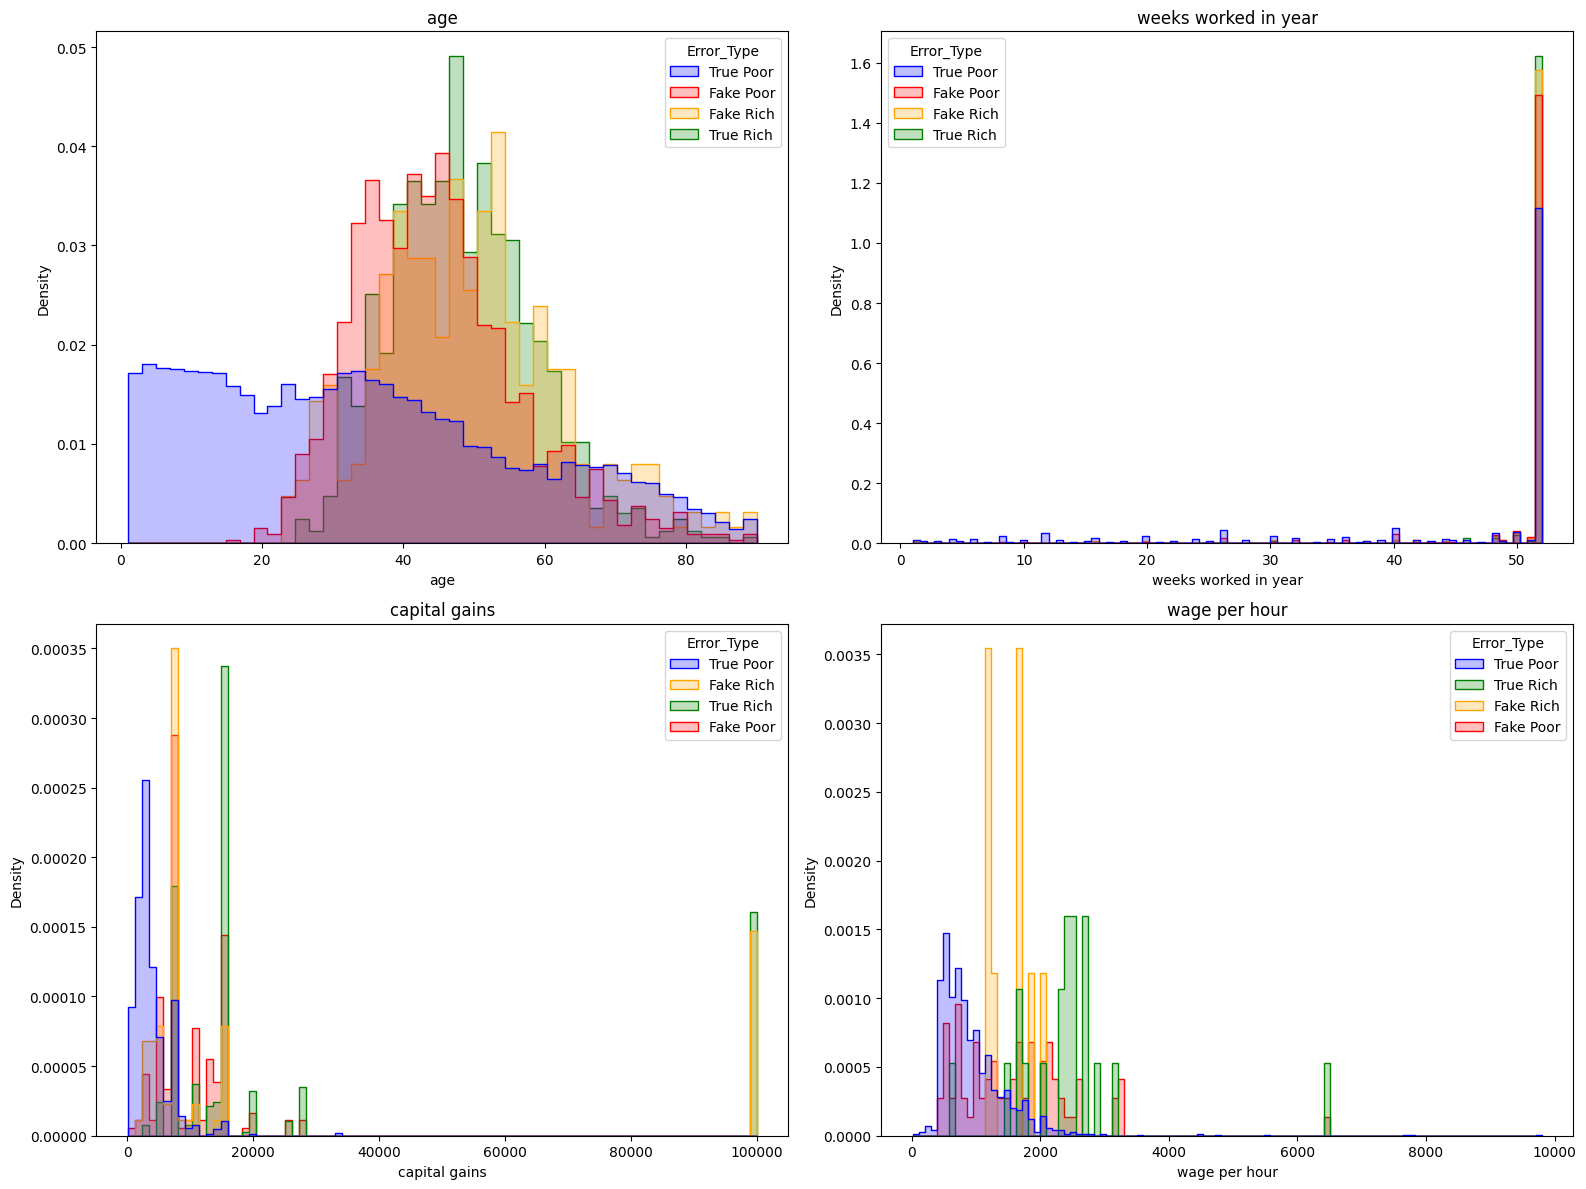

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features = ['age', 'weeks worked in year', 'capital gains', 'wage per hour']


palette = {
    'True Rich': 'green', 
    'Fake Poor': 'red', 
    'Fake Rich': 'orange', 
    'True Poor': 'blue'
}


for ax, feature in zip(axes.flatten(), features):
    subset = analysis_df[analysis_df[feature] > 0]
    sns.histplot(
            data=subset, x=feature, hue='Error_Type', 
            element="step", stat="density", common_norm=False, 
            palette=palette, ax=ax
        )
    ax.set_title('{}'.format(feature))


plt.tight_layout()
plt.show()